![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [1]:
# Import libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start your code here!

In [2]:
# Load the telecom demographics dataset
df1 = pd.read_csv('telecom_demographics.csv')
df1.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157


In [3]:
# Load the telecom_usage demographics dataset
df2 = pd.read_csv('telecom_usage.csv')
df2.head()

,customer_id,calls_made,sms_sent,data_used,churn
0,15169,75,21,4532,1
1,149207,35,38,723,1
2,148119,70,47,4688,1
3,187288,95,32,10241,1
4,14016,66,23,5246,1


In [4]:
# Merge df1 and df2 as churn_df
churn_df = df1.merge(df2, on='customer_id')
print(churn_df.head())

   customer_id telecom_partner gender  ...  sms_sent data_used churn
0        15169          Airtel      F  ...        21      4532     1
1       149207          Airtel      F  ...        38       723     1
2       148119          Airtel      F  ...        47      4688     1
3       187288    Reliance Jio      M  ...        32     10241     1
4        14016        Vodafone      M  ...        23      5246     1

[5 rows x 14 columns]


In [5]:
# Proportion of 'churn' column that is 1
churn_df['churn'].value_counts(normalize=True)[1]

0.20046153846153847

In [6]:
# Determine the categorical and numerical variables
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 761.7+ KB


In [7]:
# Convert categorical variables to numeric
churn_df = pd.get_dummies(churn_df, columns=['telecom_partner', 'gender', 'state', 'city', 'registration_event'])

In [8]:
from sklearn.preprocessing import StandardScaler
# Scale the features_scaled 
scaler = StandardScaler()
# "customer_id" is not feature
features = churn_df.drop(['customer_id','churn'],axis=1)
features_scaled = scaler.fit_transform(features)

# Define Target Variable
target = churn_df['churn']


In [9]:
# split the processed data into training and testing sets
from sklearn.model_selection import train_test_split
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split( 
        features_scaled, target, test_size = 0.2, random_state = 42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5200, 1263) (5200,)
Test set: (1300, 1263) (1300,)


In [10]:

# Train Logistic Regression and store model rpedictions as logreg_pred and find accuracy score
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Logistic Regression Predictions
logreg_pred = logreg.predict(X_test)

# Evaluationg Logistic Regression Model
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, logreg_pred))

Accuracy of the model is = 0.7292307692307692


Accuracy: 72.92%


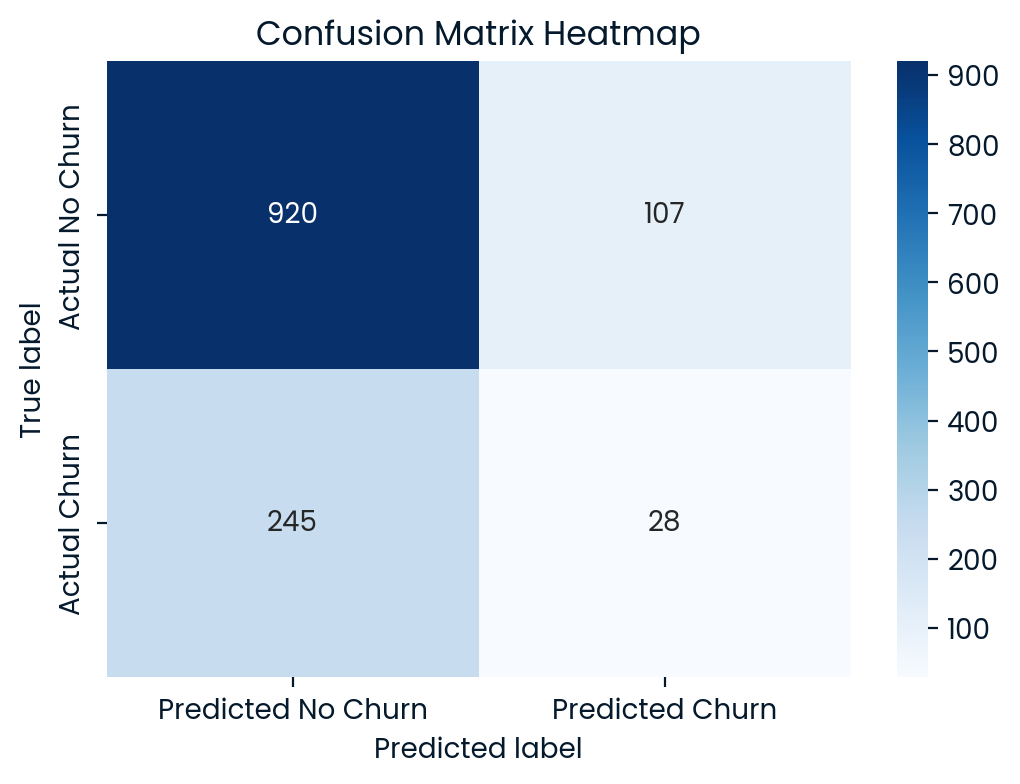

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, logreg_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Predicted No Churn", "Predicted Churn"],
            yticklabels=["Actual No Churn", "Actual Churn"])

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [12]:
# Train Random Forest and store model predictions as rf_pred and find accuracy score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Repeat split data (not needed again)
# X_train, X_test, y_train, y_test = train_test_split(
#     features_scaled, target, test_size=0.2, random_state=42
# )

# print('Train set:', X_train.shape, y_train.shape)
# print('Test set:', X_test.shape, y_test.shape)

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # creates 100 trees
rf.fit(X_train, y_train)

# RandomForestClassifier predictions
rf_pred = rf.predict(X_test)

Accuracy: 78.92%


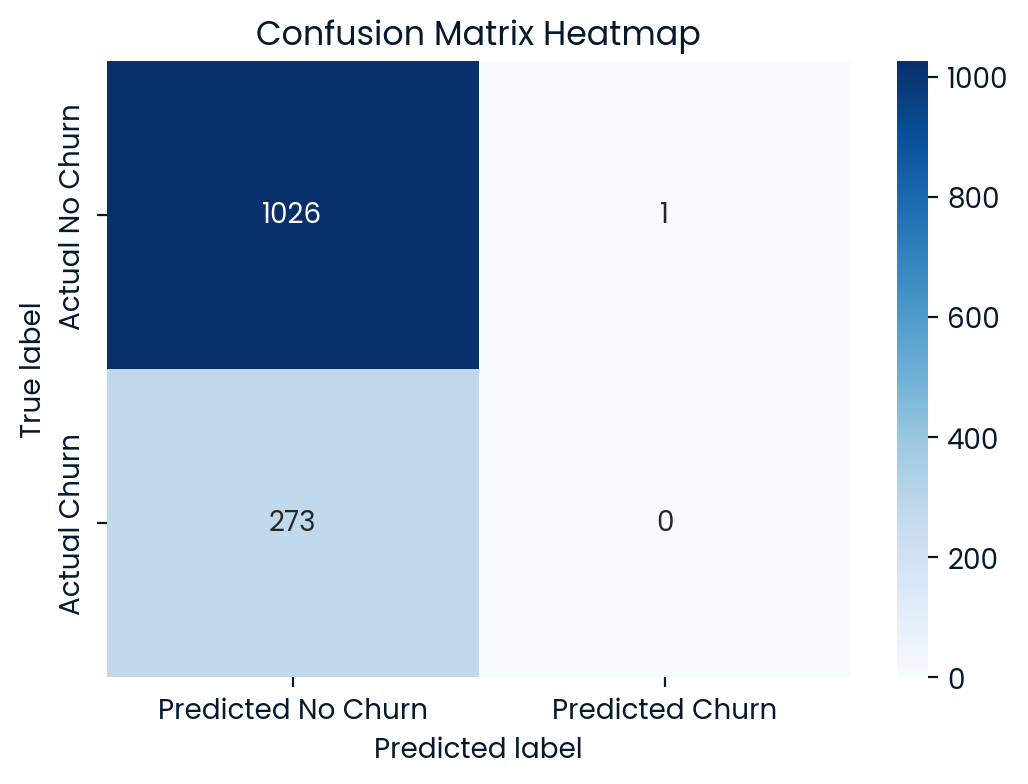

In [13]:
# Accuracy, confusion_matrix and  classification reports for RandomForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Predicted No Churn", "Predicted Churn"],
            yticklabels=["Actual No Churn", "Actual Churn"])

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [14]:
# Generate and print the classification report for Logistic Regression
class_report = classification_report(y_test, logreg_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1027
           1       0.21      0.10      0.14       273

    accuracy                           0.73      1300
   macro avg       0.50      0.50      0.49      1300
weighted avg       0.67      0.73      0.69      1300



In [15]:
# Generate and print the classification report for RandomForestClassifier
class_report = classification_report(y_test, rf_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.39      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



In [16]:
# Which accuracy score is higher? Ridge or RandomForest
higher_accuracy = "RandomForest"

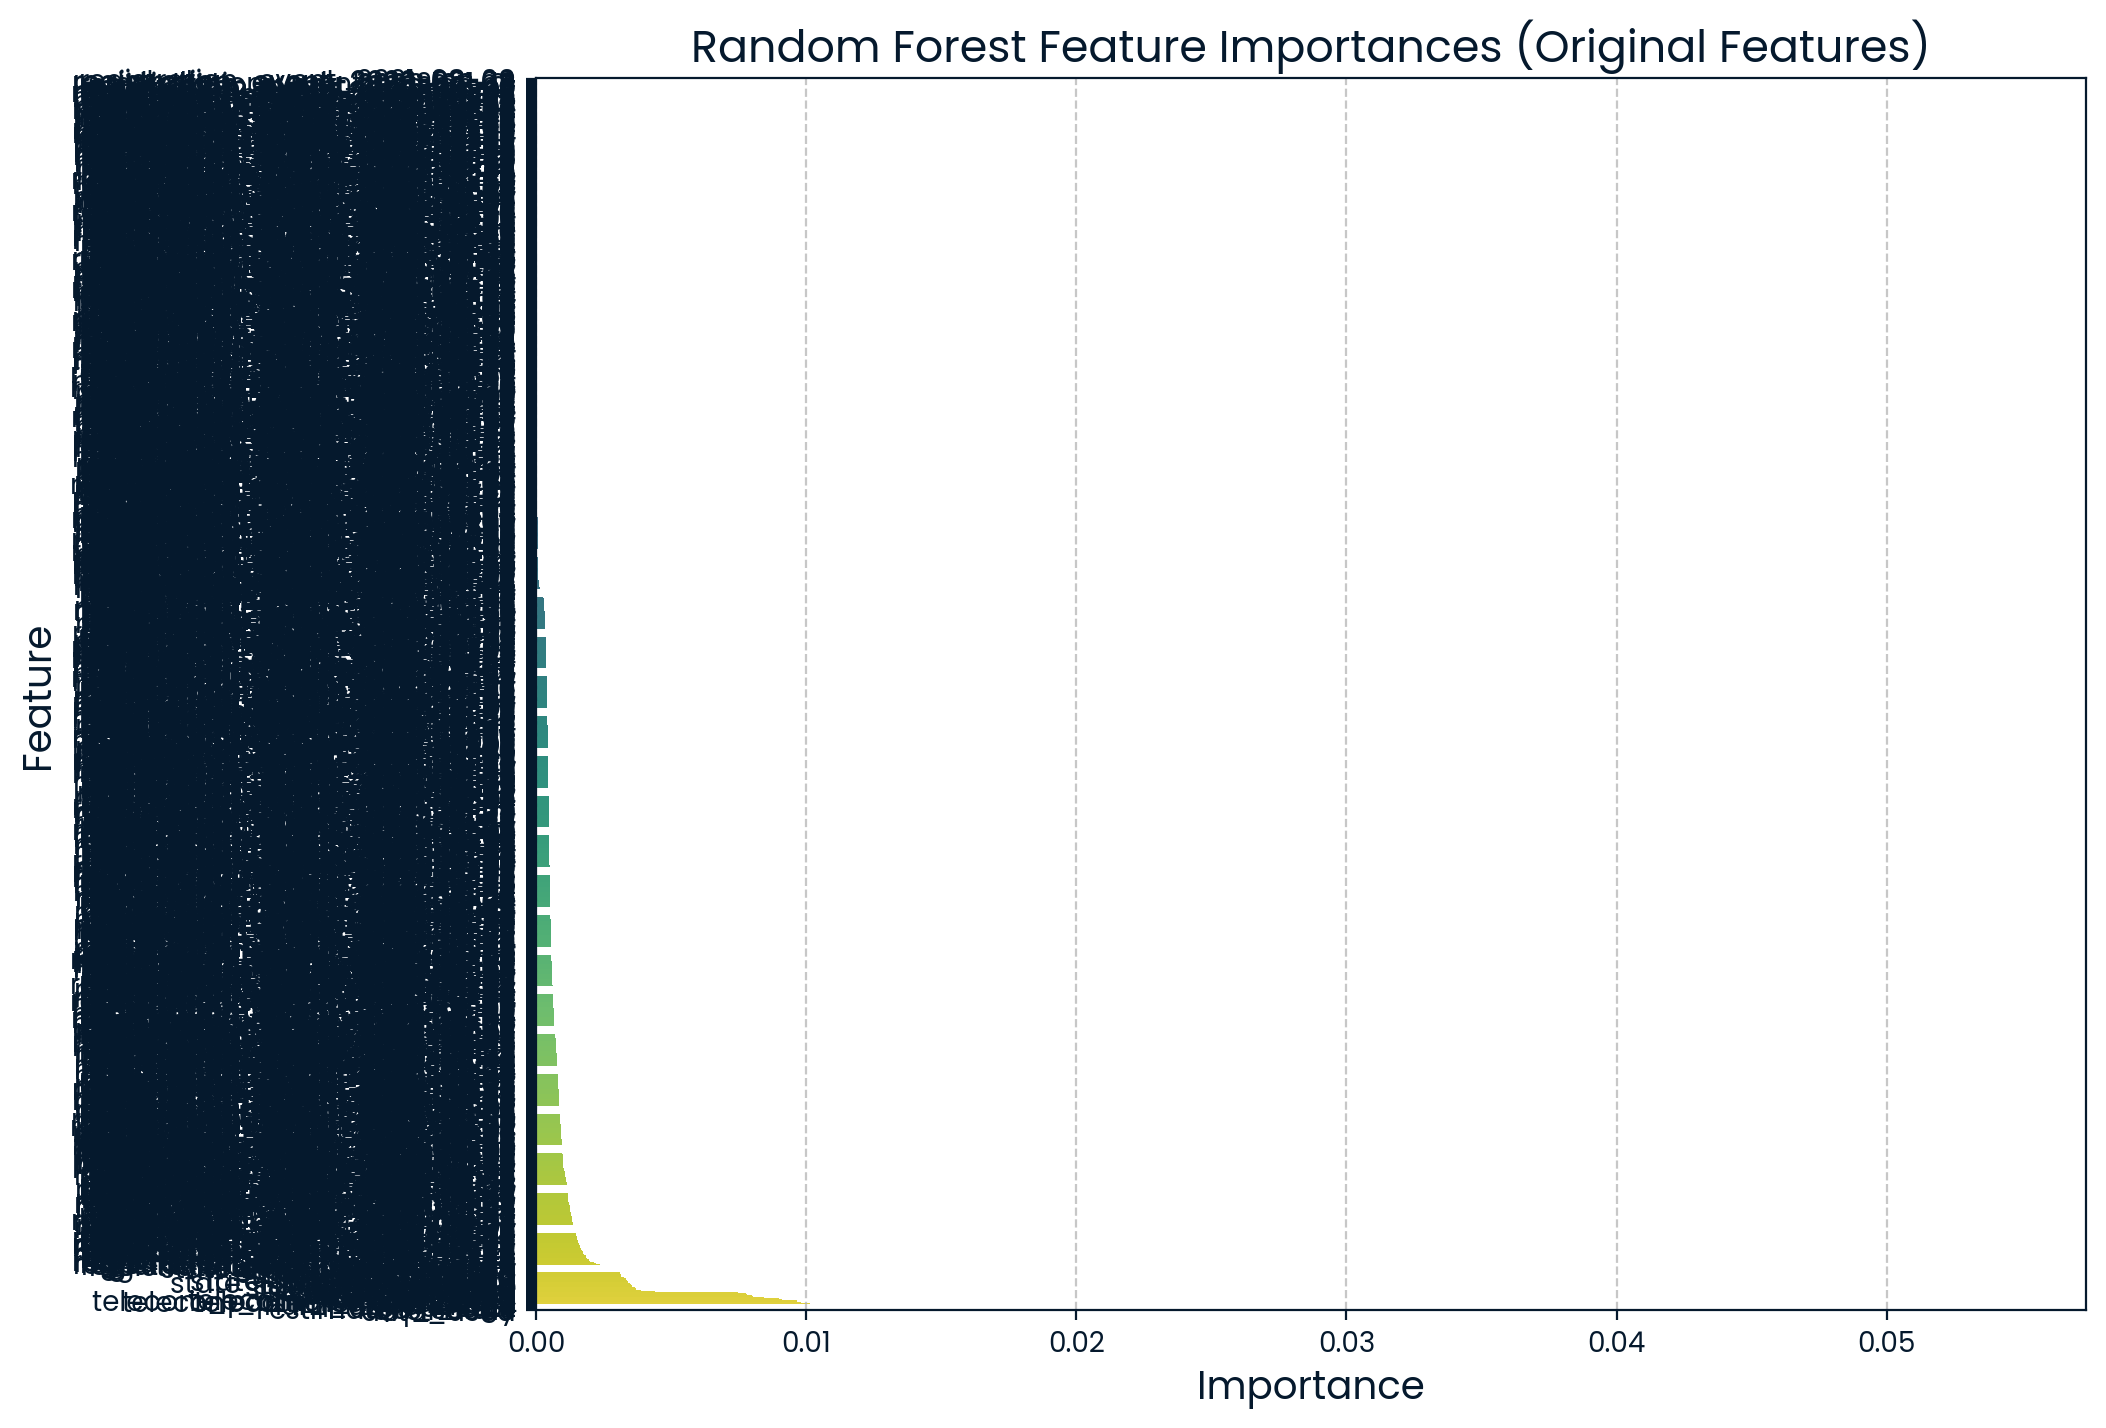

In [17]:
# Feature importance for the RandomForest model using original features (churn_df)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from churn_df (excluding 'customer_id' and 'churn')
feature_names = churn_df.drop(['customer_id', 'churn'], axis=1).columns

# Get feature importances from the trained RandomForest model
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)  # ascending for horizontal barplot

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances (Original Features)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.tight_layout()

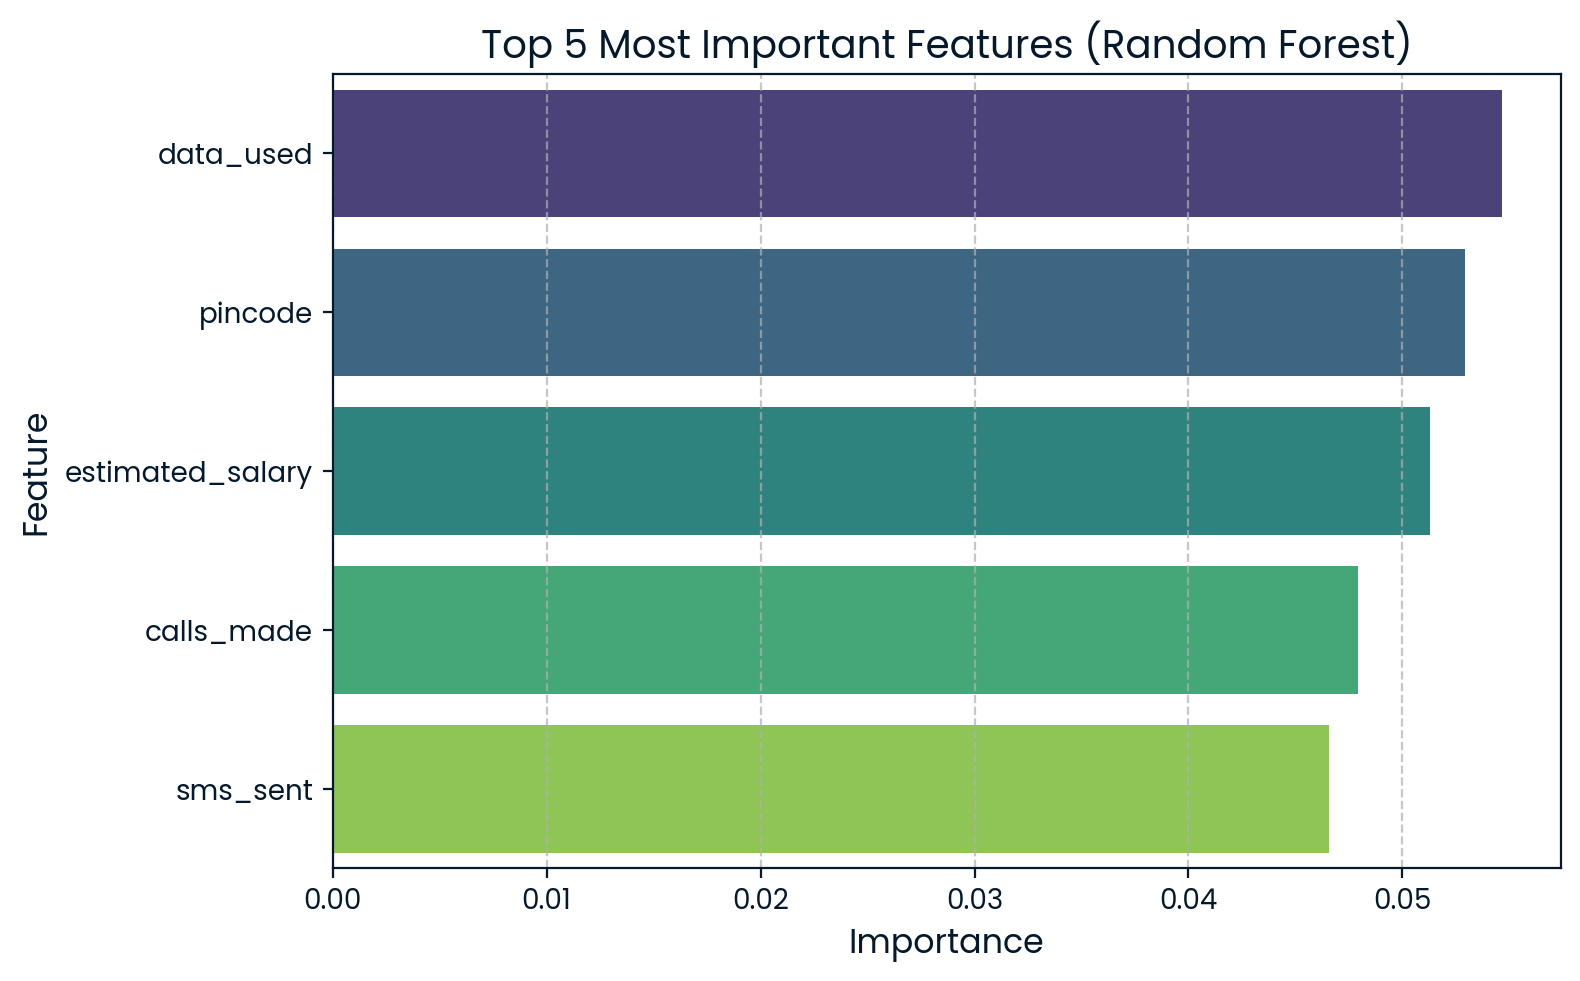

In [24]:
# Find the best (most important) features for the RandomForest model and plot them

# Number of top features to select
top_n = 5

# Sort features by importance (descending) and select top_n
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(top_n)

# Display the top features DataFrame
top_features

# Plot barplot of top features
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Most Important Features (Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [26]:


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize and fit XGBoost classifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_clf.fit(X_train, y_train)

# Predict on test set

y_pred = xgb_clf.predict(X_test)

# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7769230769230769